In [1]:
# from google.colab import files
# uploaded = files.upload()


In [ ]:
# Data already downloaded - using local file
# !gdown --id 13atAjRD7sIt0pv2Y__ytYvVWCKo4RPn_
# !unzip archive.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13atAjRD7sIt0pv2Y__ytYvVWCKo4RPn_
To: /content/archive.zip
100% 152k/152k [00:00<00:00, 47.3MB/s]
Archive:  archive.zip
  inflating: 2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv")
df.head()

,index,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,...,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,...,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,...,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,...,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13


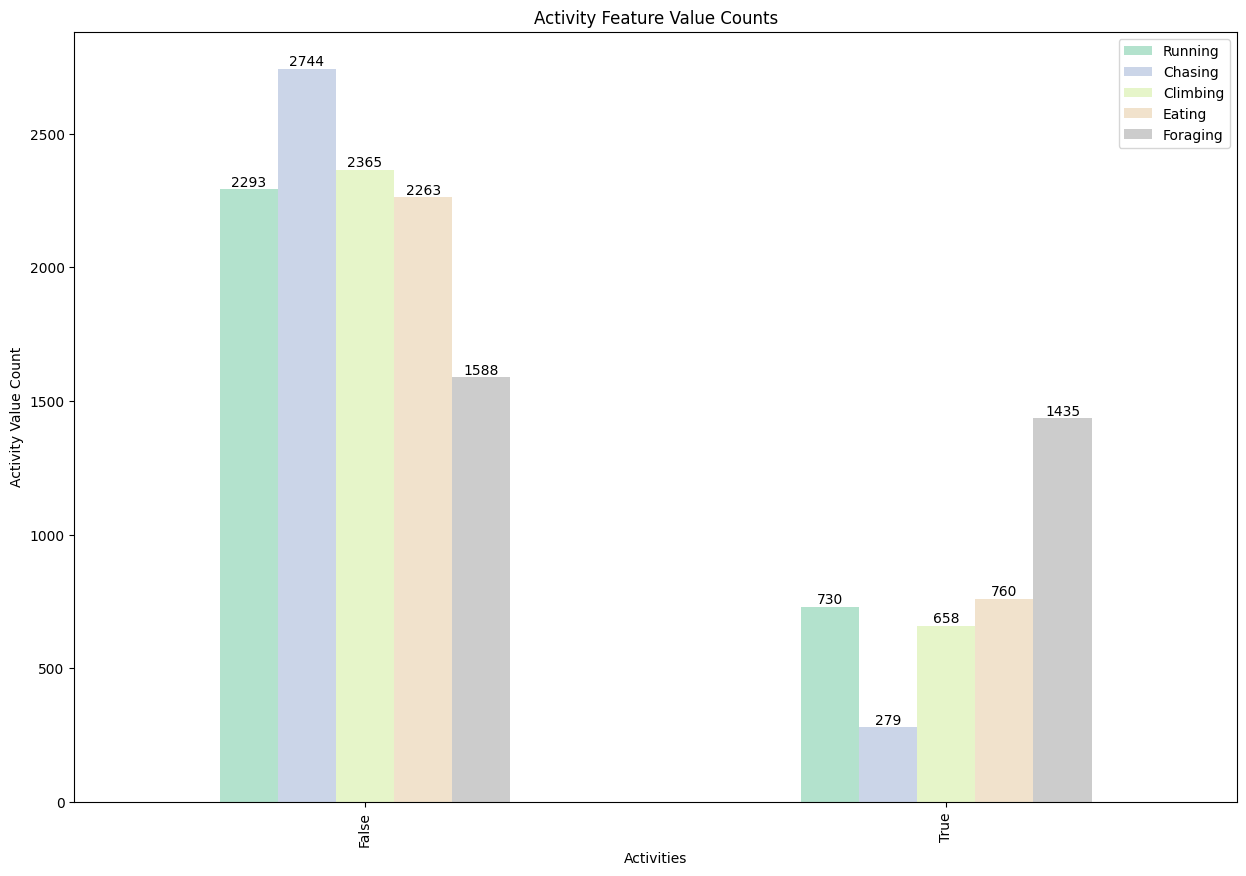

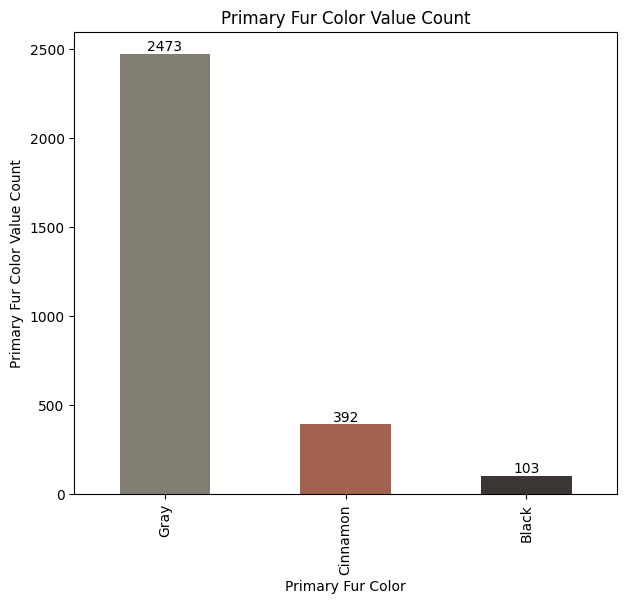

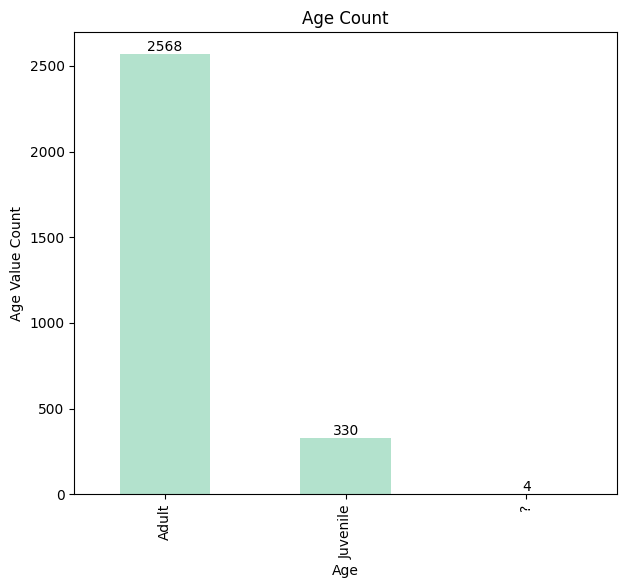

In [4]:
import seaborn as sns

# the value counts of the 5 Activity Categories
features_counted = pd.DataFrame({
    'Running':df['Running'].value_counts(),
    'Chasing':df['Chasing'].value_counts(),
    'Climbing':df['Climbing'].value_counts(),
    'Eating':df['Eating'].value_counts(),
    'Foraging':df['Foraging'].value_counts(),
})

# the value counts of the Fur Colors
ax=features_counted.plot(kind='bar', cmap = 'Pastel2',stacked=False, figsize=(15,10))
plt.xlabel('Activities')
plt.ylabel('Activity Value Count')
plt.title("Activity Feature Value Counts")
for label in ax.containers:
  ax.bar_label(label, label_type='edge', fontsize=10, color='black')
plt.show()

fur_count = df['Primary Fur Color'].value_counts()
plt.xlabel('Primary Fur Color')
plt.ylabel('Primary Fur Color Value Count')
plt.title("Primary Fur Color Value Count")
custom_colors = ['#827e74', '#a3624d', '#3b3634']
ax = fur_count.plot(kind='bar', color=custom_colors, figsize=(7,6))
for label in ax.containers:
  ax.bar_label(label, label_type='edge', fontsize=10, color='black')
plt.show()

# the value counts of the Age
age_count = df['Age'].value_counts()
plt.xlabel('Age')
plt.ylabel('Age Value Count')
plt.title("Age Count")
ax = age_count.plot(kind='bar', cmap='Pastel2', figsize=(7,6))
for label in ax.containers:
  ax.bar_label(label, label_type='edge', fontsize=10, color='black')
plt.show()

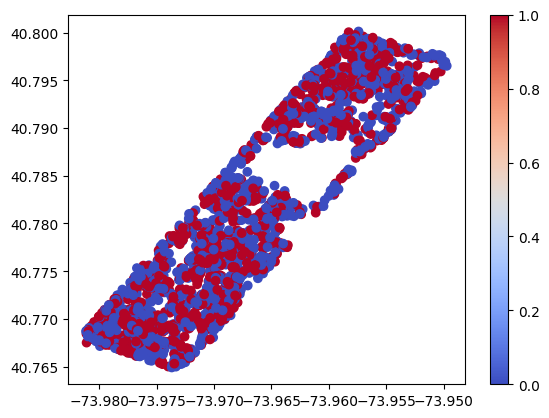

In [5]:
encoded_color = pd.get_dummies(df, columns = ['Primary Fur Color'])

# a test to see how well spread out the Foraging column data points are
plt.scatter(df['X'], df['Y'], c=df['Foraging'], cmap = 'coolwarm')
plt.colorbar()
plt.show()